In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_full = pd.read_hdf('data/df_full.h5')
df_full.head()

,id,date,available,price,minimum_nights,maximum_nights,host_id,host_response_time,host_is_superhost,host_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,review,month
0,2595,2022-06-04,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,...,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,0 11/21/2009\n1 5/28/2009\n2 ...,Jun
1,2595,2022-06-05,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,...,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,0 11/21/2009\n1 5/28/2009\n2 ...,Jun
2,2595,2022-06-06,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,...,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,0 11/21/2009\n1 5/28/2009\n2 ...,Jun
3,2595,2022-06-07,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,...,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,0 11/21/2009\n1 5/28/2009\n2 ...,Jun
4,2595,2022-06-08,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,...,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,0 11/21/2009\n1 5/28/2009\n2 ...,Jun


Let's run some EDA first and see what we can find


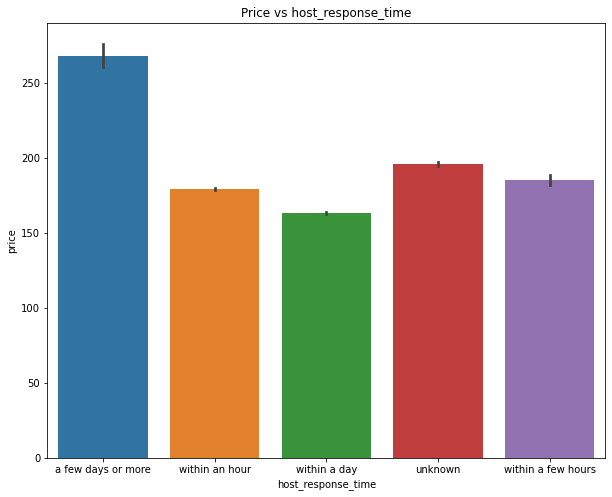

In [4]:
#Price vs host_response_time
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs host_response_time')
sns.barplot(y="price", x="host_response_time", data=df_full)
plt.savefig('pics/host_response_time_graph.png')

A host that responds in a few days or more has the highest priced AirBnBs. The rest are roughly the same

<AxesSubplot:title={'center':'Price vs host_is_superhost'}, xlabel='host_is_superhost', ylabel='price'>

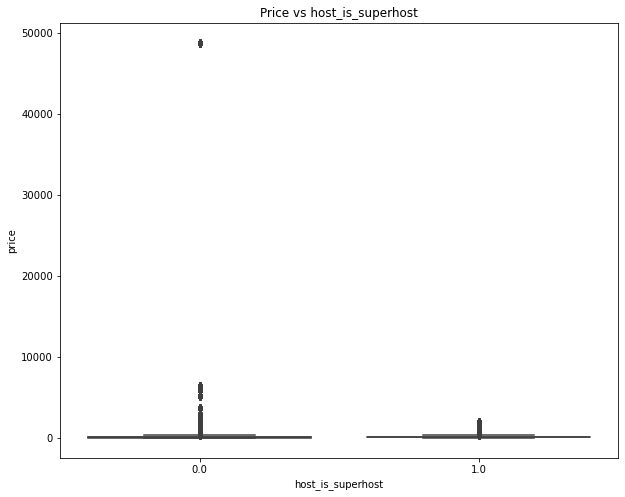

In [5]:
#Price vs host_is_superhost
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs host_is_superhost')
sns.boxplot(data=df_full, x='host_is_superhost', y='price')

There are too many outliers that we can't see the data. Let's look where the price is under $1000


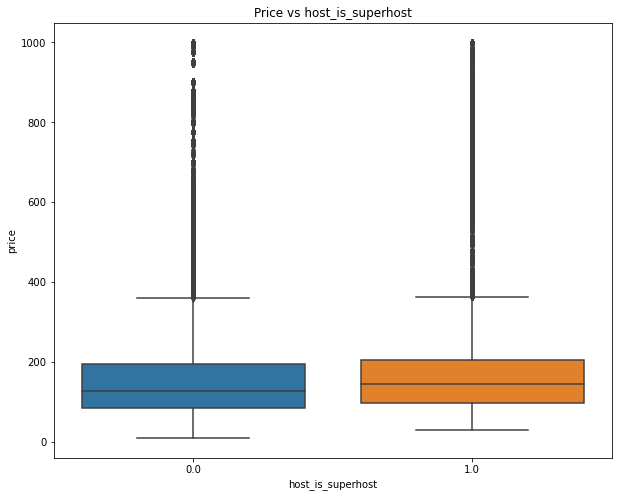

In [6]:
#Price < $1000 vs host_is_superhost
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs host_is_superhost')
sns.boxplot(data=df_full[df_full['price'] < 1000], x='host_is_superhost', y='price')
plt.savefig('pics/host_is_superhost_graph.png')

They look about even with being a superhost maybe being a bit higher.


<AxesSubplot:title={'center':'Price vs host_has_profile_pic'}, xlabel='host_has_profile_pic', ylabel='price'>

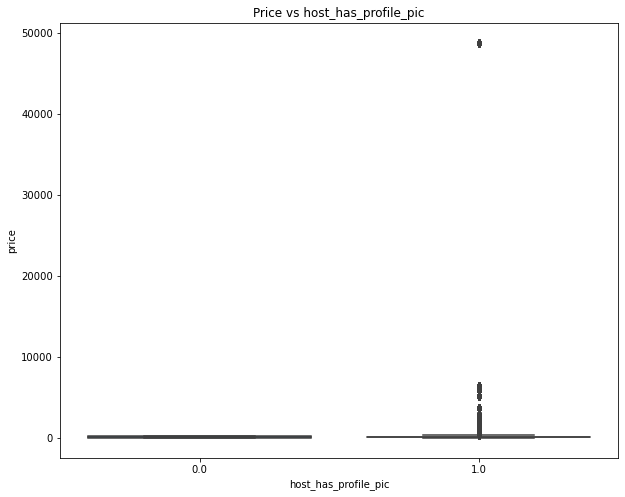

In [7]:
#Price vs host_has_profile_pic
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs host_has_profile_pic')
sns.boxplot(data=df_full, x='host_has_profile_pic', y='price')

Again there are a lot of outliers making it hard to see the data so let's zoom in on the less than $1000 group

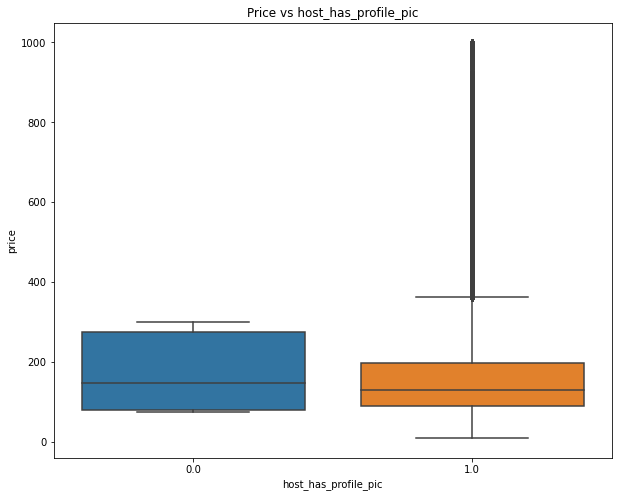

In [8]:
#Price < $1000 vs host_has_profile_pic
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs host_has_profile_pic')
sns.boxplot(data=df_full[df_full['price'] < 1000], x='host_has_profile_pic', y='price')
plt.savefig('pics/host_has_profile_pic_graph.png')

Having a profile pic doesn't seem to effect the price of an AirBnB much.

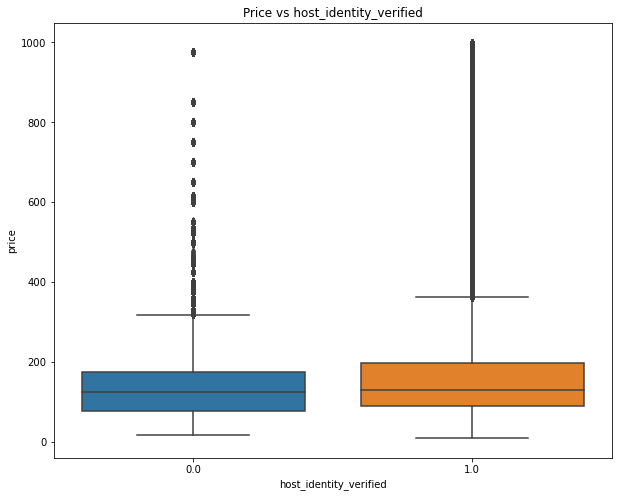

In [9]:
#Price < $1000 vs host_identity_verified
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs host_identity_verified')
sns.boxplot(data=df_full[df_full['price'] < 1000], x='host_identity_verified', y='price')
plt.savefig('pics/host_identity_verified_graph.png')

Having your identity verified at best gives a tiny edge on it not being verified


In [ ]:
#Price vs boroughs
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs boroughs')
sns.barplot(y="price", x="neighbourhood_group_cleansed", data=df_full)
plt.savefig('pics/neighbourhood_group_cleansed_graph.png')

Manhattan costs much more than the other boroughs of New York. Brooklyn is second highest priced, followed by Staten Island, Queens, and the Bronx has the lowest priced AirBnBs.


In [ ]:
#Price vs Room type
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs Room type')
sns.barplot(y="price", x="room_type", data=df_full)
plt.savefig('pics/room_type_graph.png')

Hotel_room and Entire home/apt AirBnBs cost the most. A private room costs the least.


In [ ]:
#Price < $1000 vs Has Availability
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs Has Availability')
sns.boxplot(data=df_full[df_full['price'] < 1000], x='has_availability', y='price')
plt.savefig('pics/has_availability_graph.png')

Having availability at best only gives a tiny price increase


In [ ]:
#Price < $1000 vs Instant Bookable
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs Instant Bookable')
sns.boxplot(data=df_full[df_full['price'] < 1000], x='instant_bookable', y='price')
plt.savefig('pics/instant_bookable_graph.png')

There is no noticeable difference in having or not having instant bookable


In [ ]:
#Price vs Months
plt.figure(figsize=(10,8))
plt.tight_layout(pad=2)
plt.title('Price vs Months')
sns.barplot(y="price", x="month", data=df_full)
plt.savefig('pics/month_graph.png')

Only July seems to have an increase in price. But not by much.


In [ ]:
boroughs = pd.get_dummies(df_full[['price', 'neighbourhood_group_cleansed']], columns=['neighbourhood_group_cleansed'])

In [ ]:
#look at the heat map
plt.figure(figsize=(10,8))
sns.heatmap(boroughs.corr()[['price']].sort_values(by='price',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');
plt.savefig('pics/heatmap.png')

This shows which boroughs has the biggest influence on the price